# Two-dim experiments

In [1]:
import sys
sys.path.append("/home/lauro/code/msc-thesis/svgd")
import time

import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd
from jax import lax
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import numpy as onp

import utils
import metrics
import stein
import plot
from svgd import SVGD

rkey = random.PRNGKey(1)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [14]:
d = 2
k = 3

mean = np.array([1, 2])
cov = np.array([[1,1], [1, 2]])
dist = metrics.Gaussian(mean, cov)

n = 100
n_steps = 300
svgd = SVGD(dist, n_steps, particle_shape=(n, d))

h = np.array([1000] * d)
lr = 0.1
svgd_stepsize = 1
bandwidth = np.log(h)

In [15]:
rkey = random.split(rkey)[0]

In [16]:
st = time.time()
x, log = svgd.train(rkey, bandwidth, lr, svgd_stepsize, n_steps)
x.block_until_ready()
end = time.time()
print(f"took {end - st} seconds")
print(log["desc"]["bandwidth"][-4:][:, 0])
learned_h = log["desc"]["bandwidth"][-1]

100%|██████████| 300/300 [00:08<00:00, 33.55it/s]


took 9.048622846603394 seconds
[4.6708949e+10 4.3523412e+10 4.6704673e+10 4.3521835e+10]


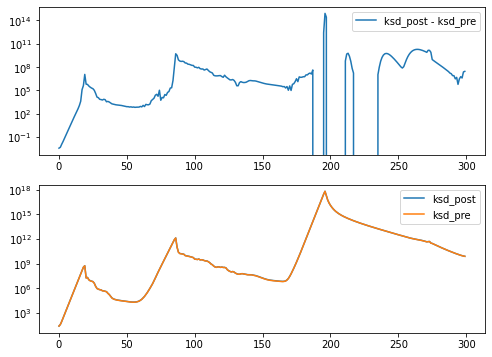

In [25]:
fig, axs = plt.subplots(2,1, figsize=[8, 6])
names = ["ksd_post", "ksd_pre"]
ax = axs[0]
ax.plot(log[names[0]] - log[names[1]], label="ksd_post - ksd_pre")
ax.set_yscale("log")
ax.legend()

ax = axs[1]
for key in names:
    lines = ax.plot(log[key], label=key)
    ax.set_yscale("log")
    ax.legend()

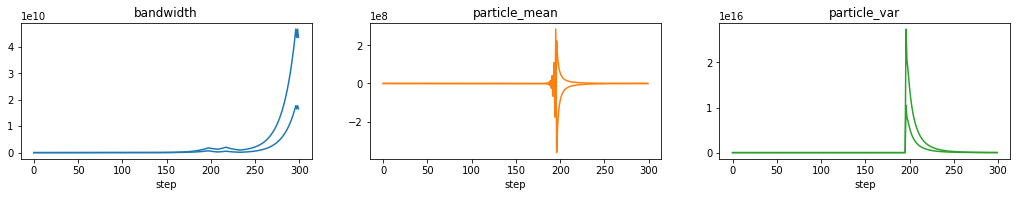

In [26]:
plot.svgd_log(log)

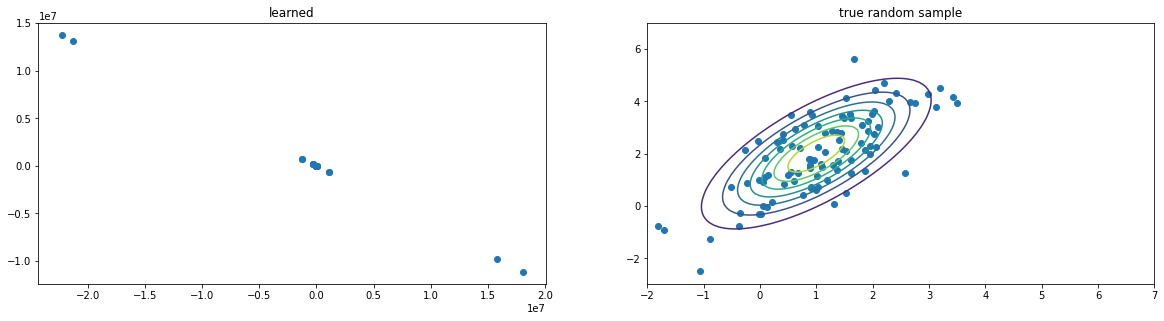

In [28]:
s = dist.sample(shape=(n,1))

fig, axs = plt.subplots(1, 2, figsize = [20, 4.8])
for ax, out, title in zip(axs, (x, s), ("learned", "true random sample")):
    _ = ax.contour(*plot.make_meshgrid(dist.pdf, [-2, 7]))
    _ = ax.scatter(*out.T)
    _ = ax.set_title(title)

# Metrics

In [ ]:
for key, titles in dist.metric_names.items():
    fig, axes = plt.subplots(1, 4, figsize=(2*4*3, 4))
    data = mdict[key]
    
    for ax, title, *dat in zip(axes, titles, *data):
        sample = dat[-1]
        dat = np.array(dat[:-1])

        _ = plot.make_paired_bar_chart(dat, figax=(fig, ax))
        ax.set_title(title)
        plot.set_axhlines(ax, sample)
#         ax.set_yscale("log")